# Python Bytes domain reference authority

In [83]:
import requests
import bs4
import collections
import feedparser

## Get the RSS feed data as a dictionary

In [84]:
url = 'https://pythonbytes.fm/episodes/rss'
feed = feedparser.parse(url)
print(feed.get('feed').get('title'))

Python Bytes


In [85]:
print(f"Size of downloaded data: {len(str(feed))/1024/1024:,.1f} MB!")

Size of downloaded data: 2.5 MB!


## Extract the entries

In [86]:
entries = feed.get('entries')
print(f"Downloaded {len(entries):,} entries.")
# print(entries[0].get('description')[:300])

Downloaded 152 entries.


## Parse the HTML from the entry descriptions

The body is RSS but each entry's description is an HTML fragment so we must parse it that way.

In [87]:
all_links = []

for e in entries:
    desc = e.get('description')
    soup = bs4.BeautifulSoup('<html><body>' + desc + '</body></html>', 'html.parser')
    
    links = [ a['href'] for a in soup.findAll('a') ]
    links = [ l.replace('www.', '') for l in links]
    links = [ l.replace('do.co', 'digitalocean.com') for l in links]
    all_links.extend(links)


# unique_links = list(set(all_links))
all_links.sort()
# Yikes, bad links!
all_links = all_links[4:]

print(f"Parsed {len(all_links):,} links from all episodes.")

Parsed 2,717 links from all episodes.


## Extract domain names from the raw links.

In [88]:
from urllib.parse import urlparse
excluded = {'pythonbytes.fm', '', '#'}
domains = [urlparse(link).netloc for link in all_links if link not in excluded]
domains = [d for d in domains if d not in excluded]
print(f"First 10 domains are {domains[:10]} ...")

First 10 domains are ['PyCon.DE', 'PythonWeekly.com', 'aka.ms', 'allaboutcode.co.uk', 'allynh.com', 'alpopkes.com', 'alpopkes.com', 'amzn.to', 'amzn.to', 'amzn.to'] ...


## Count the domains

In [89]:
from collections import Counter

cn = Counter(domains)
common = cn.most_common()

top_25 = common[:25]
top_25

[('github.com', 431),
 ('twitter.com', 190),
 ('youtube.com', 68),
 ('python.org', 66),
 ('medium.com', 51),
 ('reddit.com', 41),
 ('realpython.com', 35),
 ('pypi.python.org', 30),
 ('talkpython.fm', 30),
 ('docs.python.org', 29),
 ('testandcode.com', 25),
 ('training.talkpython.fm', 25),
 ('pypi.org', 23),
 ('hackernoon.com', 23),
 ('en.wikipedia.org', 21),
 ('digitalocean.com', 20),
 ('devguide.python.org', 20),
 ('lwn.net', 20),
 ('docs.pytest.org', 19),
 ('pythonforengineers.com', 18),
 ('pragprog.com', 15),
 ('rollbar.com', 15),
 ('arstechnica.com', 15),
 ('opensource.com', 14),
 ('insights.stackoverflow.com', 13)]

## Summary of popular domains

Import and setup `matplotlib`

In [90]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Generate a histogram of popular domains

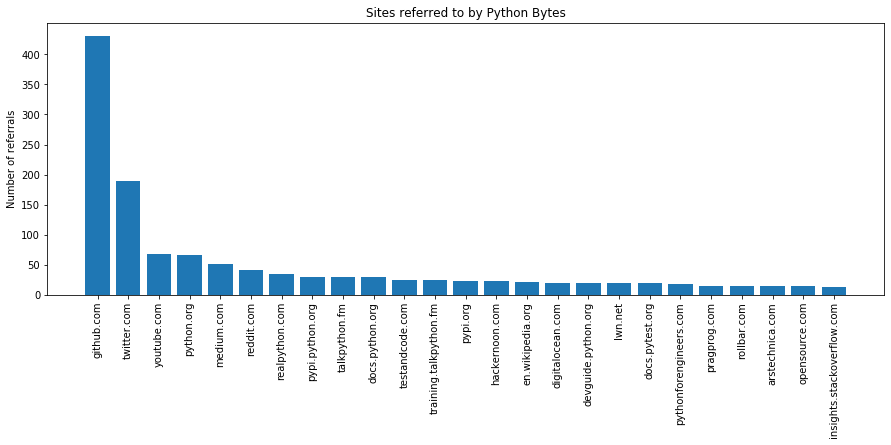

In [95]:
plt.rcParams["figure.figsize"] = (15,5)

values = [t[1] for t in top_25]
value_bins = [t[0] for t in top_25 ]

ind = list(range(1, len(values)+1))    # the x locations for the groups
width = 0.40       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width)
p1 = plt.bar(ind, values, width*2)

plt.ylabel('Number of referrals')
plt.title('Sites referred to by Python Bytes')
plt.xticks(ind, value_bins, rotation='vertical')
plt.yticks(np.arange(0, max(values), 50))
plt.width = 500